# **Project: Prediction based on the most efficient classification model**

### Loading necessary libraries needed for this project

We are using a lot of predefined functions which are imported from various libraries. The main libraries that we are using are:
- nltk
- skit-learn
- NumPy
- matplotlib
- string

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
import string
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

**Newsgroups Data and List of Stopwords(in English)**

We are also initializing four lists:
- xp and yp are initialized for plotting a bar graph of accuracy vs feature extraction
- xpc and ypc are initialized for plotting a bar graph of accuracy vs classifier model 

In [2]:
xpc=[]
ypc=[]
xp=[]
yp=[]
print('Total Newsgroups :',fetch_20newsgroups(subset='all').target_names)
print()
print("Stopwords :",stopwords.words('english'))

Total Newsgroups : ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Stopwords : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'whi

### Data Collection

Dataset=20 Newsgroups

We are splitting the dataset into three parts: training, developing, and testing sets. We will be using training and developing datasets to modify and refine our vocabulary to achieve maximum accuracy for the different classification models.

- X_train and Y_train are training datasets on which we are going to train our model.
- X_dev and Y_dev are developement datasets on which are going to develope our feature extraction models.
- X_test and Y_test are testing datasets on which we are testing our classifier models.

*The alternative way of data collection.*

In [3]:
data_train = fetch_20newsgroups(subset='train')
data_test = fetch_20newsgroups(subset='test')
X_train,Y_train=data_train.data,data_train.target
X_dev, X_test, Y_dev, Y_test = train_test_split(data_test.data, data_test.target, test_size=0.40, random_state=24)
print('Training dataset:', len(X_train))
print('Development dataset:', len(X_dev))
print('Test dataset:', len(X_test))

Training dataset: 11314
Development dataset: 4519
Test dataset: 3013


*The way we are using for this project(By splitting the data from the complete 20 newsgroup)*

In [4]:
RANDOM_STATE = 24

dataset_news=fetch_20newsgroups(subset='all')
X_train, X_intermediate, Y_train, Y_intermediate = train_test_split(dataset_news.data,dataset_news.target, test_size=0.25, random_state=RANDOM_STATE)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_intermediate, Y_intermediate, test_size=0.40, random_state=RANDOM_STATE)
print('Training dataset:', len(X_train))
print('Development dataset:', len(X_dev))
print('Test dataset:', len(X_test))

Training dataset: 14134
Development dataset: 2827
Test dataset: 1885


### Data Wrangling or Data Cleaning

**Feature Extraction 1: Without preprocessing the data**

Applying simple CountVectorizer() function without using any kind of data wrangling techniques.

This is to check whether the dataset which has stopwords, irrelevant data, or is having some missing data, can be efficient for the classification model or other refined datasets will have better accuracy.

In [5]:
feature_extraction_1 = CountVectorizer(analyzer= 'word')
Vocabulary_training = feature_extraction_1.fit_transform(X_train)
print('Feature extraction(wthout any preprocessing): vocabulary size is {} in {} documents'.format(Vocabulary_training.shape[1], Vocabulary_training.shape[0]))

Vocabulary_developing= feature_extraction_1.transform(X_dev)
classifier_NB = MultinomialNB(alpha=0.01)
classifier_NB.fit(Vocabulary_training, Y_train)
pred = classifier_NB.predict(Vocabulary_developing)
print("NB classifier accuracy: {}".format(round(metrics.accuracy_score(Y_dev, pred),4)))
xp.append("FE1")
yp.append(round(metrics.accuracy_score(Y_dev, pred),4))

Feature extraction(wthout any preprocessing): vocabulary size is 143335 in 14134 documents
NB classifier accuracy: 0.8964


Function Stem_token() for stemming of texts or tokens,using Porter's Algorithm using the function PorterStemmer() 
from from nltk.stem.porter import PorterStemmer

In [6]:
def Stem_token(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]

Function Stem_stopword_tokenize() for stemming of stopwords , by using the above function Stem_token() .

In [7]:
stop_words=[]
def Stem_stopword_tokenize(li):
    for w in li:
        ws=Stem_token(w)
        if len(ws)>1:
            for i in range(len(ws)):
                stop_words.append(ws[i])
        else:
            stop_words.append(ws[0])
    return stop_words
        

**Feature Extraction 2: By tokenization, stemming and removal of stopwords and punctuations**

We are using CountVectorizer() function with parameters like: 
- tokenizer:which will tokenize the dataset.
- stop_words:For removing stop_words and punctuations and extra 2 elements :``,becau

Under these conditions, we are checking whether the datasets don't have any stopwords and punctuations has a better model accuracy or not.

In [8]:
stop_words=Stem_stopword_tokenize(stopwords.words('english'))+ list(string.punctuation)+['``', 'becau']
Feature_extraction_2= CountVectorizer(analyzer= 'word', tokenizer=Stem_token,
                               stop_words=stop_words)
Vocabulary_training = Feature_extraction_2.fit_transform(X_train)
print('Feature extraction 2: vocabulary size is {} in {} documents'.format(Vocabulary_training.shape[1], Vocabulary_training.shape[0]))

Vocabulary_developing = Feature_extraction_2.transform(X_dev)
classifier_NB = MultinomialNB(alpha=0.01)
classifier_NB.fit(Vocabulary_training, Y_train)
pred = classifier_NB.predict(Vocabulary_developing)
print("NB classifier accuracy: {}".format(round(metrics.accuracy_score(Y_dev, pred),4)))
xp.append("FE2")
yp.append(round(metrics.accuracy_score(Y_dev, pred),4))

Feature extraction 2: vocabulary size is 176885 in 14134 documents
NB classifier accuracy: 0.8939


**Feature Extraction 3:By tokenization, stemming, removing accents, removal of stopwords and punctuations and performing other character normalization**

We are using CountVectorizer() function with parameters like: 
- tokenizer:which will tokenize the dataset.
- stop_words:For removing stop_words and punctuations and extra 2 elements :``,becau
- strip_accents:For removing accents and performing other character normalization
- lowercase:Converting all to lowercase before tokenizing
- ngram_range:(1,2)means unigrams and bigrams


In [9]:
Feature_extraction_3 = CountVectorizer(analyzer= 'word', tokenizer=Stem_token,
                                stop_words=Stem_stopword_tokenize(stopwords.words('english'))+ list(string.punctuation)+['``', 'becau'],
                                lowercase=True, strip_accents='ascii', ngram_range=(1,2))
Vocabulary_training= Feature_extraction_3.fit_transform(X_train)
print('Feature extraction 3: vocabulary size is {} in {} documents'.format(Vocabulary_training.shape[1], Vocabulary_training.shape[0]))

Vocabulary_developing = Feature_extraction_3.transform(X_dev)
classifier_NB = MultinomialNB(alpha=0.01)
classifier_NB.fit(Vocabulary_training, Y_train)
pred = classifier_NB.predict(Vocabulary_developing)
print("NB classifier accuracy: {}".format(round(metrics.accuracy_score(Y_dev, pred),4)))
xp.append("FE3")
yp.append(round(metrics.accuracy_score(Y_dev, pred),4))

Feature extraction 3: vocabulary size is 1441567 in 14134 documents
NB classifier accuracy: 0.9162


**Feature Extraction 4:Same parameters as the Feature Extraction 3 but using a different function TfidfVectorizer() for tokenization of words.**

Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.
Hence, in this Feature extraction algorithm we are using TfidVectorizer instead of CountVectorizer.

We are using TfidVectorizer() function with parameters like: 
- tokenizer:which will tokenize the dataset.
- stop_words:For removing stop_words and punctuations and extra 2 elements :``,becau
- strip_accents:For removing accents and performing other character normalization
- lowercase:Converting all to lowercase before tokenizing
- ngram_range:(1,2)means unigrams and bigrams
- min_df: Ignoring terms that have a document frequency strictly lower than the given threshold.
- max_df: ignoring terms that have a document frequency strictly higher than the given threshold.


In [10]:
Feature_extraction_4 = TfidfVectorizer(analyzer= 'word', tokenizer=Stem_token,
                                stop_words=Stem_stopword_tokenize(stopwords.words('english'))+ list(string.punctuation)+['``', 'becau'],
                                lowercase=True, strip_accents='ascii', ngram_range=(1,2),
                                min_df=5, max_df= 0.75)
Vocabulary_training = Feature_extraction_4.fit_transform(X_train)
print('Feature extraction 4: vocabulary size is {} in {} documents'.format(Vocabulary_training.shape[1], Vocabulary_training.shape[0]))

Vocabulary_developing = Feature_extraction_4.transform(X_dev)
classifier_NB = MultinomialNB(alpha=0.01)
classifier_NB.fit(Vocabulary_training, Y_train)
pred = classifier_NB.predict(Vocabulary_developing)
print("NB classifier accuracy: {}".format(round(metrics.accuracy_score(Y_dev, pred),4)))
xp.append("FE4")
yp.append(round(metrics.accuracy_score(Y_dev, pred),4))

Feature extraction 4: vocabulary size is 86096 in 14134 documents
NB classifier accuracy: 0.9197


**Finalized Feature Extraction Algorithm**

From the graph given below, we know that feature extraction 4  has the best NB classifier accuracy, so we are going to use it for our classification models and prediction algorithm. 

Our finalized Feature extraction is Feature_extraction_4 as it has the maximum NB classifier accuracy.

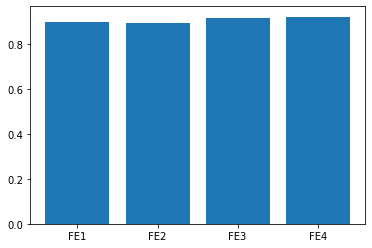

In [11]:
x = np.array(xp)
y= np.array(yp)
plt.bar(x,y)
plt.show()

### Train and Test

**Classifier Models: Multinomial Naive Bayes(MultinomialNB()) classifier, Logistic Regression(LogisticRegression()) and Stochastic Gradient Descent(SGDClassifier())**

We are using three different machine learning techniques for the classification model and we will select the one, which will have the best model accuracy .
These 3 Machine Learning Techniques are:
- Multinomial Naive Bayes
- Logistic Regression
- Stochastic Gradient Descent

In [12]:
Vocabulary_test = Feature_extraction_4.transform(X_test)
classifier_NB = MultinomialNB(alpha=0.01)
classifier_NB.fit(Vocabulary_training, Y_train)
predict = classifier_NB.predict(Vocabulary_test)
print("NB classifier accuracy: {}".format(round(metrics.accuracy_score(Y_test, predict),4)))
xpc.append("NB classifier")
ypc.append(round(metrics.accuracy_score(Y_test, predict),4))

classifier_logistic_regression = LogisticRegression(penalty = 'l2', solver='sag', C=5, random_state=RANDOM_STATE, n_jobs=-1)
classifier_logistic_regression.fit(Vocabulary_training, Y_train)
predict = classifier_logistic_regression.predict(Vocabulary_test)
print("Logistic regression classifier accuracy: {}".format(round(metrics.accuracy_score(Y_test, predict),4)))
xpc.append("LR classifier")
ypc.append(round(metrics.accuracy_score(Y_test, predict),4))

classifier_SGD = SGDClassifier(tol=0.0001, penalty="l2", alpha=0.0001, random_state=RANDOM_STATE, n_jobs=-1)
classifier_SGD.fit(Vocabulary_training, Y_train)
predict = classifier_SGD.predict(Vocabulary_test)
print("Stochastic Gradient Descent classifier accuracy: {}".format(round(metrics.accuracy_score(Y_test, predict),4)))
xpc.append("SGD classifier")
ypc.append(round(metrics.accuracy_score(Y_test, predict),4))


NB classifier accuracy: 0.9066
Logistic regression classifier accuracy: 0.9151
Stochastic Gradient Descent classifier accuracy: 0.9188


**Graph of Accuracy vs Classification models**

   Accuracies are given as:
- NB classifier accuracy: 0.9058
- Logistic regression classifier accuracy: 0.9151
- Stochastic Gradient Descent classifier accuracy: 0.9202

From the graph we can see that the SGDclassifier or Stochastic Gradient Descent classifier has the best accuracy for predicting input corpus into one of the 20 newsgroups.However, multinomial NB has marginally lower accuracy but perfoms significantly much faster than the other classifiers on the new test set 

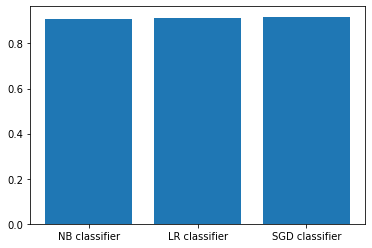

In [13]:
xc = np.array(xpc)
yc= np.array(ypc)
plt.bar(xc,yc)
plt.show()

### Prediction algorithm based Stochastic Gradient Descent Classifier

AS SGD classifier has the best accuracy we are going to use this for predicting input text(corpus) using the predictingNewsGroup() function which prints the following:

Predicted newsgroup: filename

For this I am using 5 sentences from the 20 newsgroups dataset to check its integrity.

In [14]:
def predictingNewsGroup(text, classifier):
    Vocabulary_test = Feature_extraction_4.transform([text])
    targets = dataset_news.target_names
    idx = classifier.predict(Vocabulary_test)
    print("Predicted newsgroup: {}".format(targets[int(idx)]))
    return

print()
predictingNewsGroup("My argument is that the sole purpose of the death penalty is tok ill people", classifier_SGD)
predictingNewsGroup("RIPEM is available via anonymous FTP to citizens and permanent residents in the U.S", classifier_SGD)
predictingNewsGroup("Honorable mentions to Majestic Marty and Warren Rychel", classifier_SGD)
predictingNewsGroup("left turn signal won't stop automaticaly", classifier_SGD)
predictingNewsGroup("here is it difficult to obtain handguns legally for protection, registration figures are meaningless.", classifier_SGD)


Predicted newsgroup: alt.atheism
Predicted newsgroup: sci.crypt
Predicted newsgroup: rec.sport.hockey
Predicted newsgroup: rec.autos
Predicted newsgroup: talk.politics.guns
